In [16]:
# pip install seaborn

In [29]:
import pandas as pd
import seaborn as sns

In [30]:
data = pd.read_csv('TCPA strategy - Hellofresh-metric.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55361 entries, 0 to 55360
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                55361 non-null  object 
 1   Campaign ID                         55361 non-null  int64  
 2   Ad group ID                         55361 non-null  int64  
 3   Keyword ID                          55361 non-null  int64  
 4   Keyword                             55361 non-null  object 
 5   Match type                          55361 non-null  object 
 6   Bidding strategy type               55361 non-null  object 
 7   Ad group name                       55361 non-null  object 
 8   Campaign name                       55361 non-null  object 
 9   Impressions                         55361 non-null  int64  
 10  Clicks                              55361 non-null  int64  
 11  Cost                                55361

In [31]:
data = pd.read_csv('TCPA strategy - Hellofresh-metric.csv')
data.rename(columns={'Date':'date','Ad group ID':'ad_group_id','Campaign ID':'campaign_id','Cost':'cost','Keyword ID':'keyword_id','Cost per conversion':'cost_per_conversion','Conversions':'conversions','Clicks':'clicks','Impressions':'impressions','Impression share':'impression_share','Keyword':'keyword','Bidding strategy type':'bidding_strategy_type','Ad group name':'ad_group_name','Campaign name':'campaign_name'},inplace=True)
data['date'] = pd.to_datetime(data['date']).dt.strftime('%y-%m-%d')
data = data[data['campaign_name'] == 'US-S[01]: Prospecting | Brand | Subscription - Broad'].copy()
data.fillna(0,inplace=True)
data

,date,campaign_id,ad_group_id,keyword_id,keyword,Match type,bidding_strategy_type,ad_group_name,campaign_name,impressions,...,conversions,Conversion rate,Value per conversion,Return on ad spend (ROAS),impression_share,Search rank lost impression share,Lost impressions,Absolute top impression percentage,Lost impressions due to rank,Estimated total conversion rate
221,22-01-01,13273184594,122879339237,46839732707,www hellofresh com,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,1325,...,24.05,7.29,34.46,0.34,0.62,0.38,757,0.80,757,0.77
222,22-01-01,13273184594,122879339237,49526709012,hellofresh com,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,1977,...,48.86,8.05,44.83,0.63,0.67,0.33,921,0.81,921,1.01
223,22-01-01,13273184594,122879339237,50657052167,hello fresh com,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,4297,...,61.77,6.97,35.07,0.39,0.51,0.49,3823,0.69,3823,0.69
224,22-01-01,13273184594,122879339237,294870259587,hello fresh box,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,122,...,0.00,0.00,0.00,0.00,0.25,0.75,327,0.45,327,0.41
225,22-01-01,13273184594,122879339237,296080198929,www hello fresh,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,2430,...,50.70,8.77,40.54,0.45,0.76,0.24,756,0.81,756,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55345,22-07-06,13273184594,122879339237,302429439038,hellofreshcom,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,66,...,0.00,0.00,0.00,0.00,0.00,0.00,0,0.15,0,1.00
55346,22-07-06,13273184594,122879339237,324312504855,hello fresh service,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,5,...,0.00,0.00,0.00,0.00,0.00,0.00,0,0.40,0,1.00
55347,22-07-06,13273184594,122879339237,360638208892,hello fresh options,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,12,...,0.00,0.00,0.00,0.00,0.00,0.00,0,0.64,0,0.00
55348,22-07-06,13273184594,122879339237,381486190255,hello fresh plan,Broad,Target CPA,Subscription,US-S[01]: Prospecting | Brand | Subscription -...,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00


In [32]:
tcpa = pd.read_csv("hellofresh_meals-tcpa.csv")
tcpa['date'] = pd.to_datetime(tcpa['date']).dt.strftime('%y-%m-%d')
tcpa.rename(columns={'campaigns name':'campaign_name'},inplace=True)
tcpa["final"].unique()


array(['$135.00', '$105.00', '$111.00', '$100.00', '$98.00', '$93.00',
       '$99.00', '$95.00', '$126.00', '$90.00', '$108.00', '$80.00',
       '$85.00', '$76.00', '$75.00', '$55.00', '$40.00', '$70.00',
       '$50.00'], dtype=object)

In [33]:
budget = pd.read_csv('TCPA strategy - Hellofresh-budget.csv')
budget.rename (columns={'Date':'date','Campaign ID':'campaign_id','Daily budget':'budget'},inplace=True)
budget

,date,campaign_id,budget
0,2022-01-01,1822059265,290212.00
1,2022-01-01,8789177912,1300.52
2,2022-01-01,8789177918,2500.03
3,2022-01-01,8789177930,8400.77
4,2022-01-01,8789177936,45000.32
...,...,...,...
5611,2022-07-05,13273184594,15563.45
5612,2022-07-05,13273184600,6000.42
5613,2022-07-05,13273184603,6600.09
5614,2022-07-05,15640225612,22500.00


In [34]:
data = pd.merge(data,budget,on=['date','campaign_id'],how='left')
data = pd.merge(data,tcpa[['date','initial','final','level','campaign_name']],on=['campaign_name','date'],how='left')
data.fillna(method='ffill',inplace=True)
data.rename(columns={'final':'tcpa'},inplace=True)
tcpa["final"].nunique()

19

In [35]:
data['tcpa'] = data['tcpa'].str[1:]
data.loc[data['date']<'22-01-05','tcpa'] = 100
data['tcpa'] = data['tcpa'].astype(float)
data["tcpa"].nunique()


19

,ad_group_id,date,conversions,clicks,tcpa,cost,impression_share
0,122879339237,22-01-01,228.88,3035,100.0,19476.71,0.355333
1,122879339237,22-01-02,314.35,3425,100.0,22392.55,0.342667
2,122879339237,22-01-03,364.25,4529,100.0,29470.03,0.362667
3,122879339237,22-01-04,279.82,3611,100.0,26621.11,0.334667
4,122879339237,22-01-05,190.50,1914,50.0,11091.92,0.247333
...,...,...,...,...,...,...,...
182,122879339237,22-07-02,23.58,413,135.0,2626.00,0.377692
183,122879339237,22-07-03,17.51,451,135.0,2964.24,0.370769
184,122879339237,22-07-04,26.73,575,135.0,3884.01,0.360000
185,122879339237,22-07-05,26.95,957,135.0,6679.45,0.404667


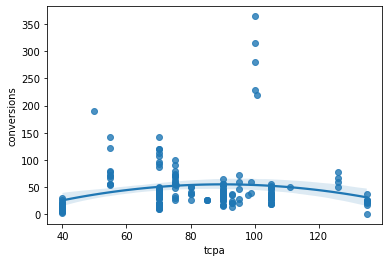

In [96]:
analysis = data.groupby(['ad_group_id','date'])[['conversions','clicks','tcpa','cost','impression_share']].agg({'conversions':'sum','clicks':'sum','tcpa':'mean','cost':'sum','impression_share':'mean'}).reset_index()
sns.regplot(x='tcpa',y='conversions',data=analysis,order=2)
analysis


<AxesSubplot:xlabel='tcpa', ylabel='clicks'>

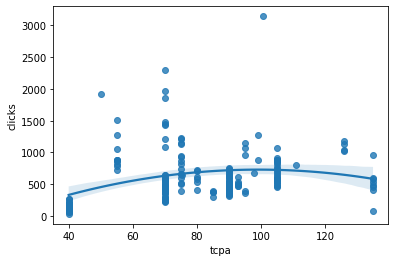

In [72]:
sns.regplot(x='tcpa',y='clicks',data=analysis,order=2)

<AxesSubplot:xlabel='date'>

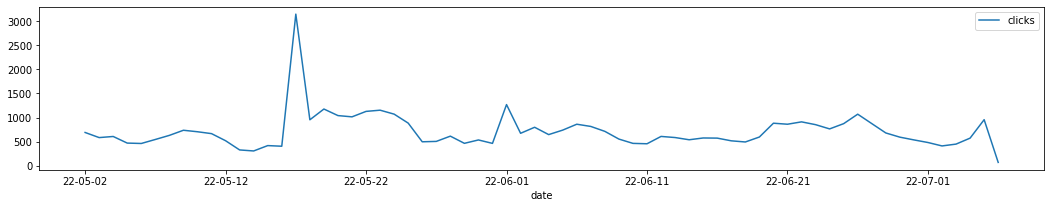

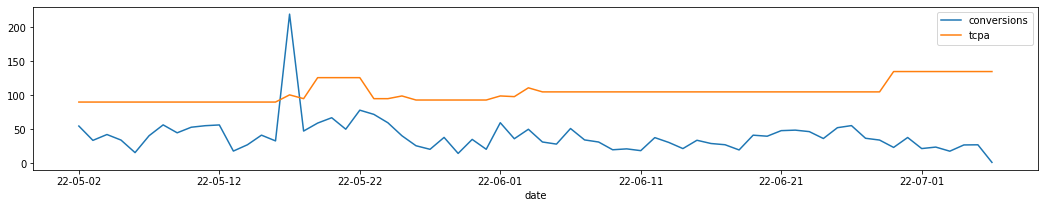

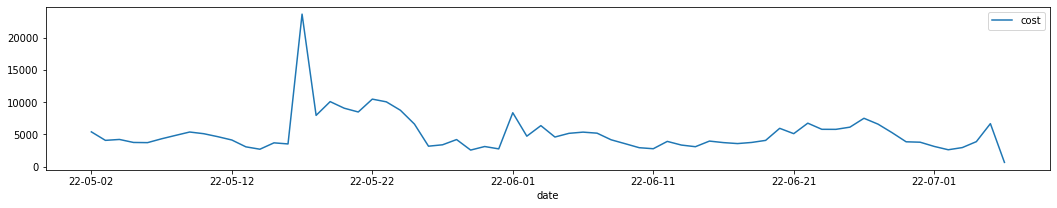

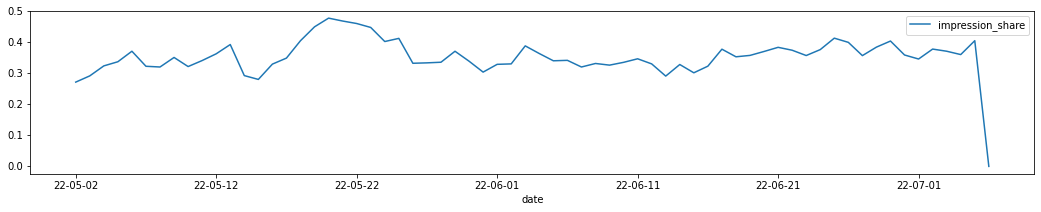

In [99]:
analysis = analysis[analysis['date']>'22-05-01']
analysis.plot(x="date",y="clicks",figsize=(18,3))
ax=analysis.plot(x="date",y="conversions",figsize=(18,3))
analysis.plot(x="date",y="tcpa",figsize=(18,3),ax=ax)
analysis.plot(x="date",y="cost",figsize=(18,3))
analysis.plot(x="date",y="impression_share",figsize=(18,3))

<AxesSubplot:>

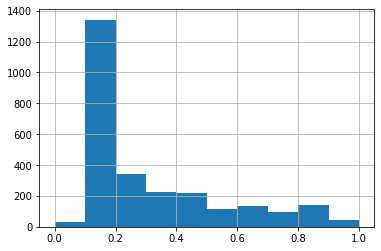

In [190]:
data['impression_share'].hist()

In [93]:
analysis = data.groupby(['ad_group_id','campaign_id','bidding_strategy_type'])[['cost','conversions','impression_share']].agg({'cost':'sum','conversions':'sum','impression_share':'mean'}).reset_index()
analysis.sort_values('cost',inplace=True,ascending=False)
analysis = analysis[analysis['bidding_strategy_type'] == 'Target CPA']

In [95]:
analysis

,ad_group_id,campaign_id,bidding_strategy_type,cost,conversions,impression_share
0,122879339237,13273184594,Target CPA,873680.07,8959.04,0.299819


In [115]:
analysis = data.groupby(['tcpa','date'])[['conversions','clicks','impression_share']].agg({'conversions':'sum','clicks':'sum','impression_share':'mean'}).reset_index()
analysis['conv_avg'] = analysis.groupby('tcpa')['conversions'].apply(lambda x : x.expanding().mean())

In [116]:
analysis

,tcpa,date,conversions,clicks,impression_share,conv_avg
0,40.0,22-02-16,8.33,68,0.189091,8.330000
1,40.0,22-02-17,4.98,75,0.211111,6.655000
2,40.0,22-02-18,6.14,77,0.178000,6.483333
3,40.0,22-02-19,2.50,33,0.247273,5.487500
4,40.0,22-02-20,7.00,71,0.161818,5.790000
...,...,...,...,...,...,...
187,135.0,22-07-02,23.58,413,0.377692,26.442500
188,135.0,22-07-03,17.51,451,0.370769,24.656000
189,135.0,22-07-04,26.73,575,0.360000,25.001667
190,135.0,22-07-05,26.95,957,0.404667,25.280000


<AxesSubplot:xlabel='date'>

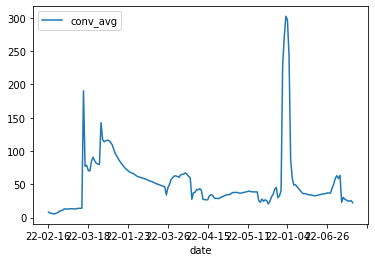

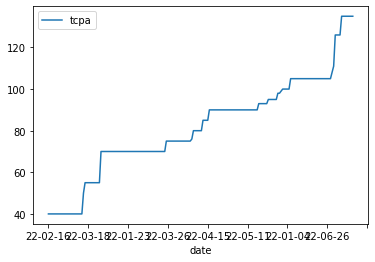

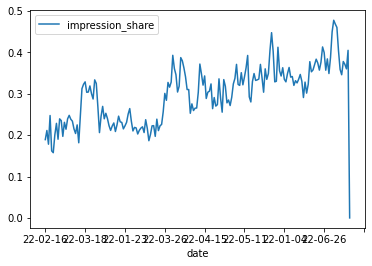

In [118]:
analysis.plot(x='date',y='conv_avg')
analysis.plot(x='date',y='tcpa')
analysis.plot(x='date',y='impression_share')

KeyError: 'tcpa'

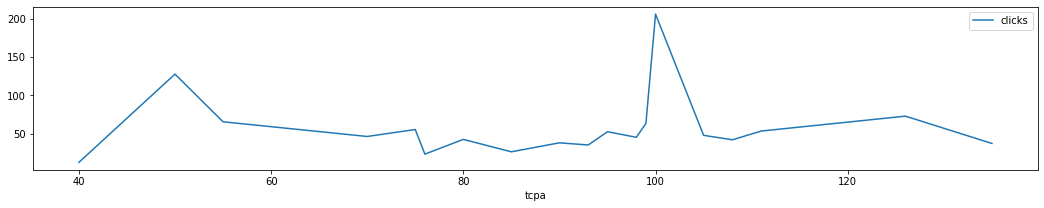

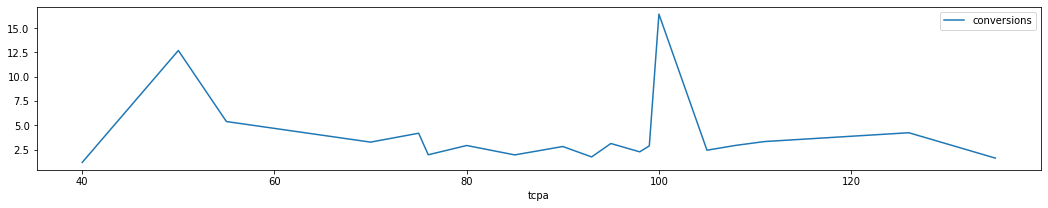

In [104]:
analysis.plot(x="tcpa",y="clicks",figsize=(18,3))
ax=analysis.plot(x="tcpa",y="conversions",figsize=(18,3))
# analysis.plot(x="tcpa",y="tcpa",figsize=(18,3),ax=ax)
analysis.plot(x="tcpa",y="cost",figsize=(18,3))
analysis.plot(x="tcpa",y="impression_share",figsize=(18,3))